Dataset used in this notebook is called MNIST dataset. You can read about it [here](http://yann.lecun.com/exdb/mnist/)

To include this dataset to your project you can use TensroFlow library as you will learn in this notebook.

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Download and extract mnist dataset.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train=x_train/255
X_test=x_test/255

In [ ]:
np.shape(X_train)

(60000, 28, 28)

In [ ]:
X_test=np.reshape(X_test,(10000,28*28))
X_train=np.reshape(X_train,(60000,28*28))

### T-SNE algorithm for dimensionality reduction used on MNIST dataset

t-SNE (t-Distributed Stochastic Neighbor Embedding) is an algorithm used for dimensionality reduction. It is used for high dimensional datasets (images for example).
It is more expensive than PCA and LDA but it gives better results for complex data as you will see below.

Working process:
    (these 3 steps can be found on Siraj PCA Live video)
    
    Step 1 - Compute similarity matrix between all feature vectors
    
    Step 2 - Compute similarity matrix from map points
    
    Step 3 - Use gradient descent to minimimze distance between matrices

In [ ]:
from sklearn.manifold import t_sne
dim_sne = t_sne.TSNE(n_components=2, n_iter=5000)

lepe_slike = dim_sne.fit_transform(X_train[:10000])

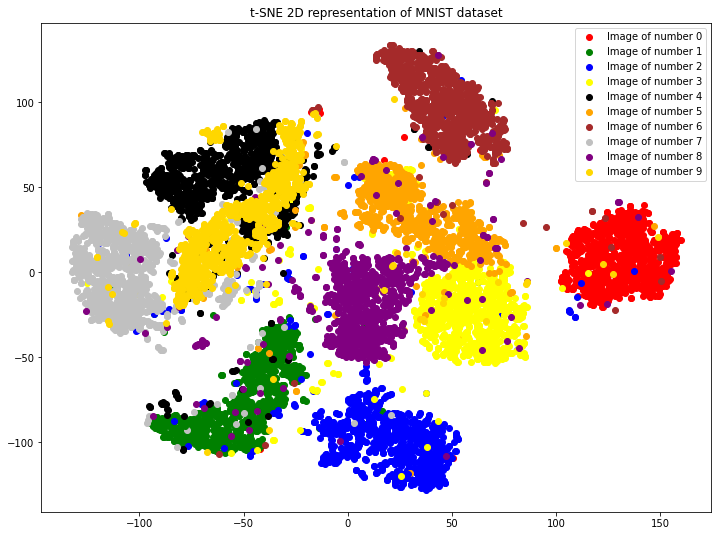

In [ ]:
colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'silver', 'purple', 'gold']
plt.figure(figsize=(12, 9))
for i in (np.unique(y_train)):
    for j in range(len(lepe_slike)):
        if y_train[j] == i:
            plt.scatter(lepe_slike[j, 0], lepe_slike[j, 1], color=colors[i])

#This is faster loop and it is used to create legent for our graph
for i in (np.unique(y_train)):
       for j in range(len(lepe_slike)):
            if y_train[j] == i:
                plt.scatter(lepe_slike[j, 0], lepe_slike[j, 1], color=colors[i], label='Image of number {}'.format(i))
                break
plt.legend()
plt.title("t-SNE 2D representation of MNIST dataset")
plt.show()

In [ ]:
from sklearn.manifold import t_sne
dim_sne = t_sne.TSNE(n_components=3, n_iter=5000)

lepe_slike = dim_sne.fit_transform(X_train[:10000])

KeyboardInterrupt: ignored

In [ ]:
import plotly.express as px

fig = px.scatter_3d( x=lepe_slike[0], y=lepe_slike[1], z=lepe_slike[2],
              color=y_train)
fig.show()

### PCA on MNIST dataset

Just for comparing purpose let's use PCA and see how mixed classes we will get.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
reduced_images = pca.fit_transform(X_train[:10000])

NameError: ignored

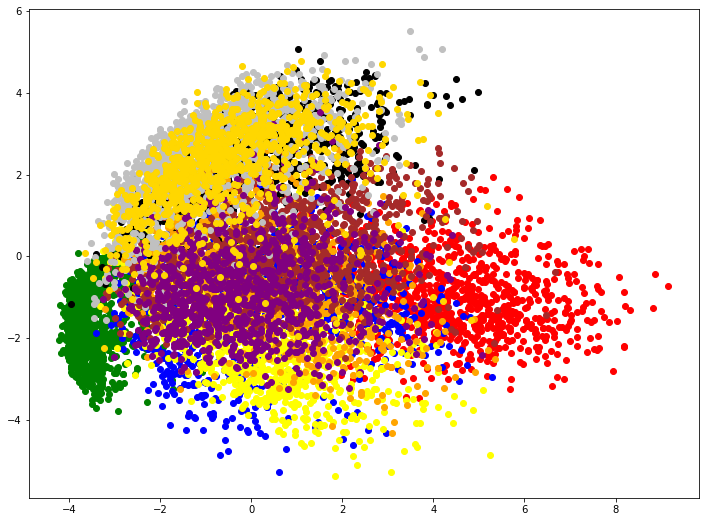

In [ ]:
colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'silver', 'purple', 'gold']
plt.figure(figsize=(12, 9))
for i in (np.unique(y_train)):
    for j in range(len(lepe_slike)):
        if y_train[j] == i:
            plt.scatter(reduced_images[j, 0], reduced_images[j, 1], color=colors[i])

#This is faster loop and it is used to create legent for our graph
for i in (np.unique(y_train)):
       for j in range(len(lepe_slike)):
            if y_train[j] == i:
                plt.scatter(reduced_images[j, 0], reduced_images[j, 1], color=colors[i], label='Image of number {}'.format(i))
                break
plt.legend()
plt.title("PCA 2D representation of MNIST dataset")
plt.show()

In [ ]:
pca = PCA(n_components=3)
reduced_images = pca.fit_transform(X_train[:10000])

In [ ]:
np.shape(reduced_images[:,0])

(10000,)

In [ ]:
red

In [ ]:
import plotly.express as px

fig = px.scatter_3d( x=reduced_images[:,0], y=reduced_images[:,1],z=reduced_images[:,2],
              color=y_train[:10000])
fig.show()

As you can see PCA is not great for high dimensional data.

### LDA on MNIST dataset

Linear Discriminant Analysis algorithm is working good on data which are mid-high dimensional and they have classes. Let's see the results of LDA on high dimenisonal data such as MNIST dataset (784 features).

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=3)

In [ ]:
reduced_images = lda.fit_transform(X_train[:10000], y_train[:10000])

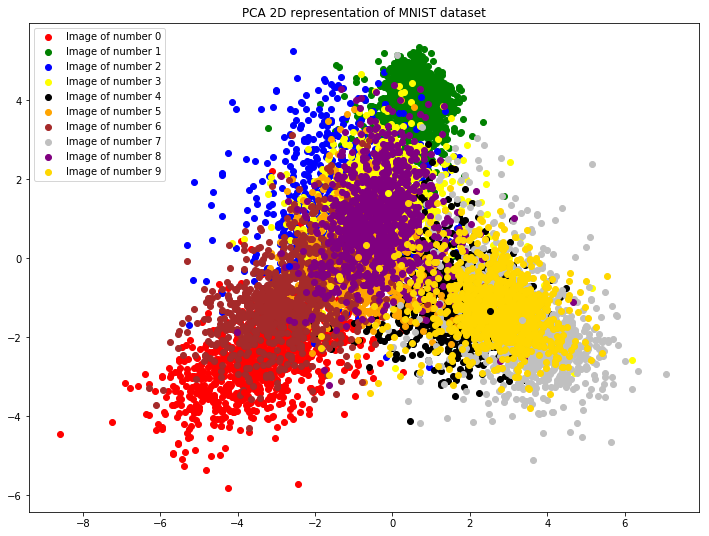

In [ ]:
colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'silver', 'purple', 'gold']
plt.figure(figsize=(12, 9))
for i in (np.unique(y_train)):
    for j in range(len(lepe_slike)):
        if y_train[j] == i:
            plt.scatter(lda_reduction[j, 0], lda_reduction[j, 1], color=colors[i])

#This is faster loop and it is used to create legent for our graph
for i in (np.unique(mnist_data.train.labels)):
       for j in range(len(lepe_slike)):
            if y_train[j] == i:
                plt.scatter(lda_reduction[j, 0], lda_reduction[j, 1], color=colors[i], label='Image of number {}'.format(i))
                break
plt.legend()
plt.title("PCA 2D representation of MNIST dataset")
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d( x=reduced_images[:,0], y=reduced_images[:,1],z=reduced_images[:,2],
              color=y_train[:10000])
fig.show()

LDA is not great eather on this high data. For now t-SNE is the best candidate for this kind of data.

### KernelPCA (rbf PCA) on MNIST dataset

Last dim reduction algorithm that we are going to try is KernelPCA which is working great on non-linear separable data. (exp. famouse donut problem)

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf')

In [ ]:
reduced_kpca = kpca.fit_transform(mnist_data.train.images[:10000])

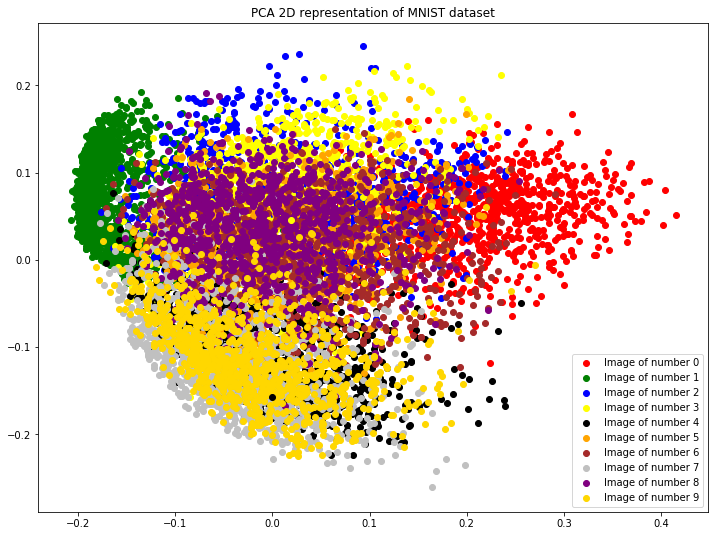

In [ ]:
colors = ['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'silver', 'purple', 'gold']
plt.figure(figsize=(12, 9))
for i in (np.unique(mnist_data.train.labels)):
    for j in range(len(lepe_slike)):
        if mnist_data.train.labels[j] == i:
            plt.scatter(reduced_kpca[j, 0], reduced_kpca[j, 1], color=colors[i])

#This is faster loop and it is used to create legent for our graph
for i in (np.unique(mnist_data.train.labels)):
       for j in range(len(lepe_slike)):
            if mnist_data.train.labels[j] == i:
                plt.scatter(reduced_kpca[j, 0], reduced_kpca[j, 1], color=colors[i], label='Image of number {}'.format(i))
                break
plt.legend()
plt.title("PCA 2D representation of MNIST dataset")
plt.show()

### Summary:

And the best algorithm for dim reduction of the high dimensional data is... *drum roll* **T-SNE**!

**PCA** is the most used one because data in real life (industry) is not often that high in demsionality, also most of our datasets don't have classes which makes learning from it harder. This kind of learning is called Unsupervised learning, because we are not providing classes for our data.

**t-SNE** is the best performing one for high dimensional data and it is used for unsupervised learning as well.

**LDA** is a great algorithm. Under the hood it works almost the same as PCA, the only difference is that LDA consideres classes of the data provided, which makes LDA supervised learning algorithm. You want to use LDA every time you have classes in your dataset.